## Data Loading
1. Load datasets
2. Select the most related sheets(tables) and columns from excel file
3. Understand the datasets

In [878]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load datasets
housing_data = pd.read_csv('housing_economic_data_2002_2023.csv')
all_consumer_trends = pd.ExcelFile('consumertrendsq42022cpnsa.xls')

# Select relevant columns from all_consumer_trends
major_trends = pd.read_excel(all_consumer_trends, sheet_name = '04CN')
minor_trends = pd.read_excel(all_consumer_trends, sheet_name = '05CN', usecols=['Date', 'Furnishing, household equipment and routine HH maintenance', 'Furniture and furnishings, carpets and other floor coverings', 'Household appliances', 'Repair of household appliances','Goods and services for routine household maintenance' ])

# Extract only columns 'Date' and 'Actual rentals paid by tenants' from the 'major_costs_O4CN'
df_rents = major_trends[['Date', 'Actual rentals paid by tenants']]

# Undersrand the datasets
print(housing_data.shape)
print(minor_trends.shape)
print(df_rents.shape)

(264, 7)
(104, 6)
(104, 2)


In [879]:
print(housing_data.head())
print(minor_trends.head())
print(df_rents.head())

         Date  Housing Cost Index  Interest Rate (%)  Inflation Rate (%)  \
0  2002-01-31          107.450712           1.452610            1.825335   
1  2002-02-28          205.376748           2.886184            2.457079   
2  2002-03-31          315.092076           2.691776            3.013669   
3  2002-04-30          437.937524           3.887176            3.761579   
4  2002-05-31          534.425223           3.993015            1.157249   

   Employment Levels (000s)  Growth in Wage (%)  GDP Growth Rate (%)  
0              28733.093163            5.416294             2.320015  
1              27707.446731            2.380654             2.947441  
2              31439.995432            6.256035            -0.830707  
3              29087.341711            4.475733            -0.826665  
4              25253.863557            4.402933            -1.743300  
      Date  Furnishing, household equipment and routine HH maintenance  \
0  1997 Q1                                 

## Data Cleaning
1. Check for missing values
2. check for  duplicates
3. Convert all Date Types to 'YYYY Qn'
4. Select the values with dates between 2002 Q1 and 2022 Q4

In [880]:
# Check for missing values
df_rents.isna().sum()
housing_data.isna().sum()
minor_trends.isna().sum()

# Check for and remove duplicates
housing_data = housing_data.drop_duplicates()
df_rents = df_rents.drop_duplicates()
minor_trends = minor_trends.drop_duplicates()

In [881]:
# Cleaning the datasets date formats
# Convert the 'Date' column to datetime format
housing_data['Date'] = pd.to_datetime(housing_data['Date'])

# Select only the last date of each quarter
housing_df = housing_data[housing_data['Date'].dt.is_quarter_end]

# Convert the 'Date' column to the format 'YYYY Qn'
housing_df['Date'] = housing_df['Date'].dt.to_period('Q').astype(str)
housing_df['Date'] = housing_df['Date'].str.replace('Q', ' Q')

# Select the data from all dataset only after 2002 Q1 to 2022 Q4
df_housing = housing_df.iloc[:84]
rents = df_rents.iloc[20:]
df_trends = minor_trends.iloc[20:]

C:\Users\mehrd\AppData\Local\Temp\ipykernel_15464\3661134431.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['Date'] = housing_df['Date'].dt.to_period('Q').astype(str)
C:\Users\mehrd\AppData\Local\Temp\ipykernel_15464\3661134431.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['Date'] = housing_df['Date'].str.replace('Q', ' Q')


## Data Exploration

In [882]:
# Understand the data
print(df_housing.head())
print(rents.head())
print(df_trends.head())

       Date  Housing Cost Index  Interest Rate (%)  Inflation Rate (%)  \
2   2002 Q1          315.092076           2.691776            3.013669   
5   2002 Q2          630.913169           0.749172            4.197642   
8   2002 Q3          959.070766           3.267249            4.494314   
11  2002 Q4         1253.271955           1.396139            2.107511   
14  2003 Q1         1502.328418           0.645812            1.738084   

    Employment Levels (000s)  Growth in Wage (%)  GDP Growth Rate (%)  
2               31439.995432            6.256035            -0.830707  
5               26561.525974            4.962039             3.154814  
8               25270.959925            5.390081             3.909193  
11              31718.927436            6.393150             4.077899  
14              32999.160854            6.252909            -0.111753  
       Date  Actual rentals paid by tenants
20  2002 Q1                            7293
21  2002 Q2                        

In [883]:
print(df_housing.tail())
print(rents.tail())
print(df_trends.tail())

        Date  Housing Cost Index  Interest Rate (%)  Inflation Rate (%)  \
239  2021 Q4        23991.351374           5.890179            2.658496   
242  2022 Q1        24285.317325           3.983705            3.008780   
245  2022 Q2        24575.281688           1.208838            3.999842   
248  2022 Q3        24884.839384           1.263549            1.820559   
251  2022 Q4        25185.768779           2.401170            2.888268   

     Employment Levels (000s)  Growth in Wage (%)  GDP Growth Rate (%)  
239              26538.959063            4.461389            -0.933088  
242              27238.176148            4.226526             1.779700  
245              30800.862078            4.964754             2.365100  
248              27656.000426            6.847062            -1.106006  
251              34556.514982            3.625950             2.961213  
        Date  Actual rentals paid by tenants
99   2021 Q4                           21984
100  2022 Q1         

In [884]:
# Get the number of rows and columns
print(df_housing.shape)
print(df_trends.shape)
print(rents.shape)

(84, 7)
(84, 6)
(84, 2)


In [885]:
# Examine the data
df_housing.describe()

,Housing Cost Index,Interest Rate (%),Inflation Rate (%),Employment Levels (000s),Growth in Wage (%),GDP Growth Rate (%)
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,12650.818147,3.125812,2.852353,29667.019678,4.727413,1.711217
std,7331.102481,1.768212,1.077995,3108.747636,1.518123,2.084875
min,315.092076,0.559607,1.018528,25178.739347,2.048854,-1.820506
25%,6370.184554,1.362992,1.878954,27231.655716,3.422428,-0.346986
50%,12636.465338,3.010183,2.869493,29073.821527,5.045441,2.266101
75%,18899.438552,4.945932,3.685032,32280.834828,6.028103,3.232030
max,25185.768779,5.930019,4.737468,34911.686261,6.933313,4.958976


In [816]:
# Examine the data
df_trends.describe()

,"Furnishing, household equipment and routine HH maintenance","Furniture and furnishings, carpets and other floor coverings",Household appliances,Repair of household appliances,Goods and services for routine household maintenance
count,84.000000,84.000000,84.000000,84.000000,84.000000
mean,13330.404762,5245.654762,2051.761905,93.440476,2251.166667
std,2892.766863,1041.934236,570.762091,33.720092,434.140276
min,9937.000000,3972.000000,1394.000000,24.000000,1573.000000
25%,11152.500000,4490.500000,1585.750000,67.750000,1902.250000
50%,12322.500000,4958.000000,1922.000000,86.000000,2142.000000
75%,15327.250000,5676.500000,2435.000000,119.000000,2662.000000
max,21371.000000,8711.000000,3791.000000,198.000000,3209.000000


In [886]:
# Examine the data
rents.describe()

,Actual rentals paid by tenants
count,84.000000
mean,15777.654762
std,5059.394210
min,7293.000000
25%,11114.000000
50%,16435.000000
75%,20648.500000
max,22639.000000


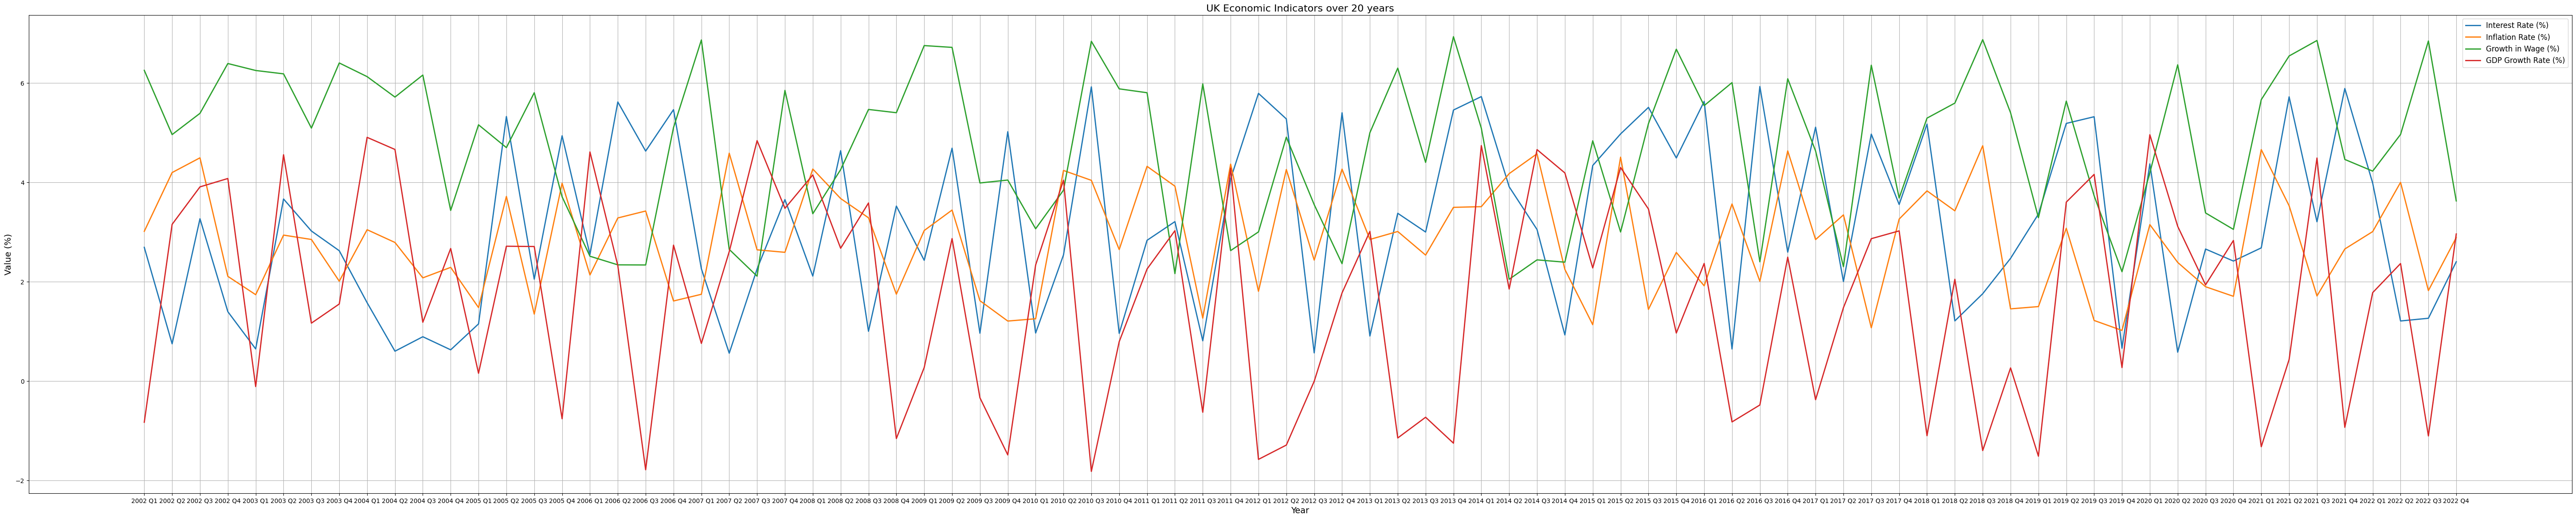

In [887]:
# Visualise the macroeconomic indicators of the past 20 years
#plt.scatter(df_housing['Date'], df_housing['Interest Rate (%)', 'Inflation Rate (%)', 'Growth in Wage (%)','GDP Growth Rate (%)'], color='c')
Economic_indicators = ['Interest Rate (%)', 'Inflation Rate (%)', 'Growth in Wage (%)','GDP Growth Rate (%)']

# Set the figure size
plt.figure(figsize=(74, 14))

# Loop through each economic indicator and plot it against 'Quarter'
for col in Economic_indicators:
    sns.lineplot(x=df_housing['Date'], y=df_housing[col], label=col, linewidth=2)

# set the title and axis labels
plt.title(' UK Economic Indicators over 20 years ', fontsize= 16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Value (%)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
# Display and close the plot
plt.show()
plt.close()

In [888]:
# Create a range of quarters from 2002Q1 to 2022Q4 
date_range = pd.period_range(start='2002Q1', end='2022Q4', freq='Q')

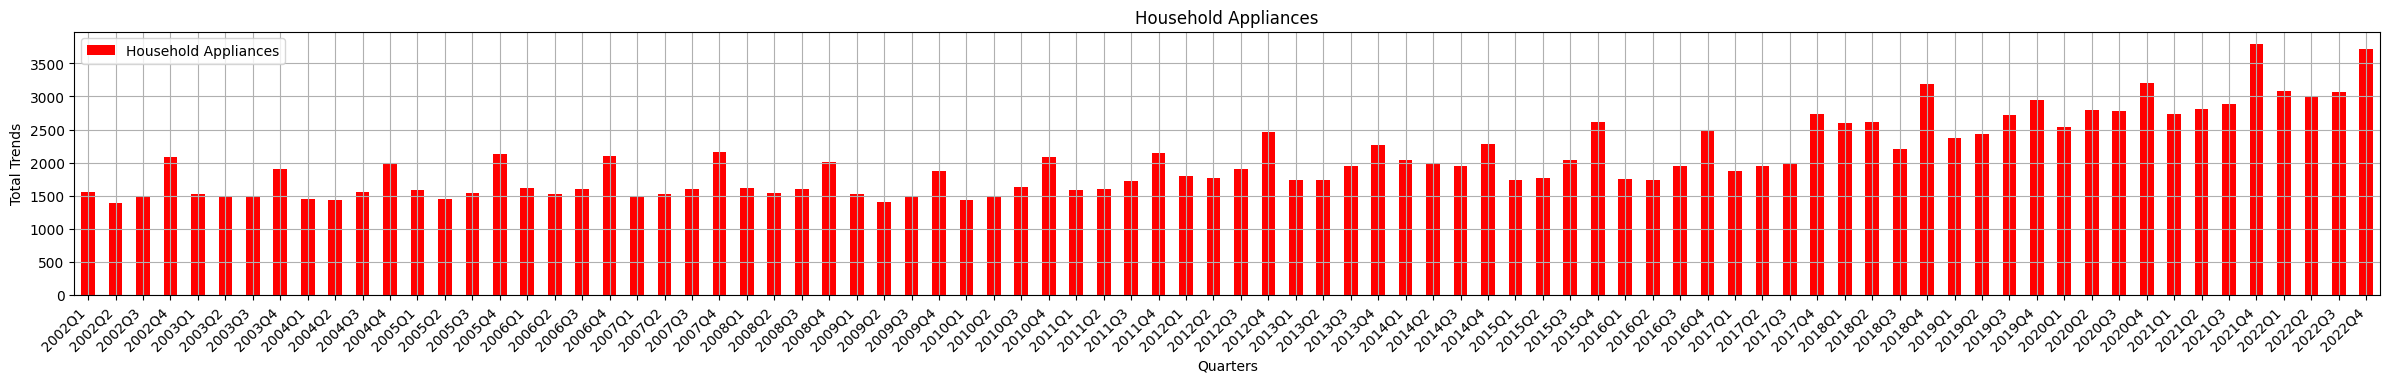

In [889]:
# Plot the Household Appliances numbers per quarter
features_to_plot = pd.DataFrame({
    'Household Appliances': df_trends['Household appliances'],
    'Date': date_range.astype(str) # Convert the PeriodIndex back to string to display by Panda
})
features_to_plot.set_index('Date', inplace=True)
features_to_plot.plot.bar(figsize=(24, 4), legend=True, grid=True, linewidth=6, title='Household Appliances', ylabel='Total Trends', xlabel='Quarters', color='red')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')

plt.show()

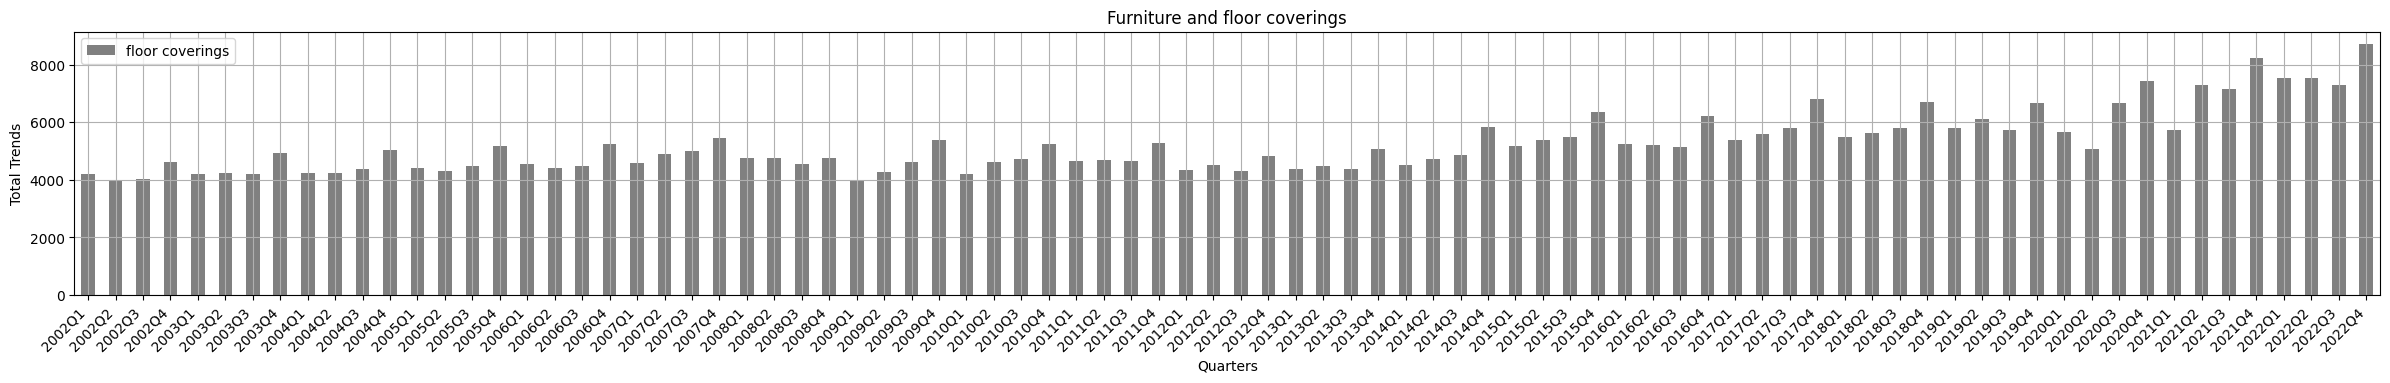

In [565]:
# Plot the floor coverings numbers per quarter

features_to_plot = pd.DataFrame({
    'floor coverings':df_trends['Furniture and furnishings, carpets and other floor coverings'],
    'Date': date_range.astype(str) # Convert the PeriodIndex back to string to display by Panda
})
features_to_plot.set_index('Date', inplace=True)
features_to_plot.plot.bar(figsize=(24, 4), legend=True, grid=True, linewidth=6, title='Furniture and floor coverings', ylabel='Total Trends', xlabel='Quarters', color='Grey')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')

plt.show()

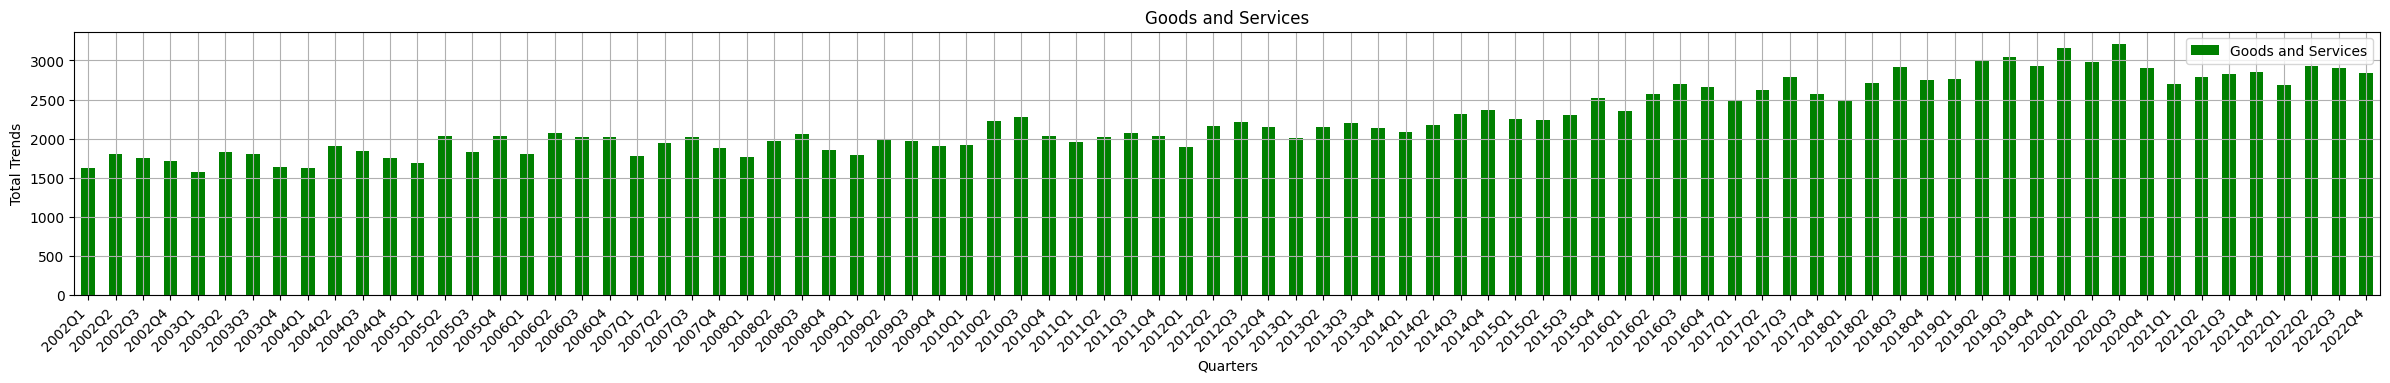

In [566]:
# Plot the Goods and Services numbers per quarter
features_to_plot = pd.DataFrame({
    'Goods and Services':df_trends['Goods and services for routine household maintenance'], 
    'Date': date_range.astype(str) # Convert the PeriodIndex back to string to display by Panda
})
features_to_plot.set_index('Date', inplace=True)
features_to_plot.plot.bar(figsize=(24, 4), legend=True, grid=True, linewidth=6, title='Goods and Services', ylabel='Total Trends', xlabel='Quarters', color='Green')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')

plt.show()

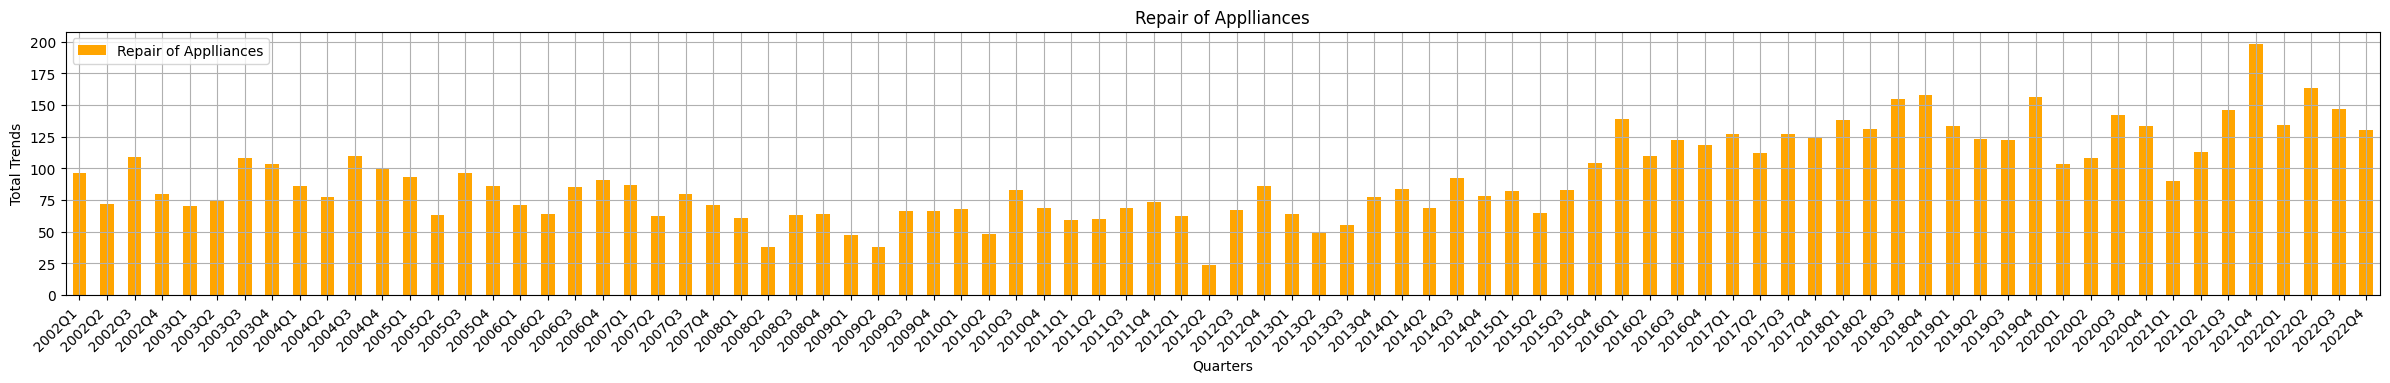

In [567]:
# Plot the Repair of Applliances numbers per quarter
features_to_plot = pd.DataFrame({
    'Repair of Applliances':df_trends['Repair of household appliances'],
    'Date': date_range.astype(str) # Convert the PeriodIndex back to string to display by Panda
})
features_to_plot.set_index('Date', inplace=True)
features_to_plot.plot.bar(figsize=(24, 4), legend=True, grid=True, linewidth=6, title='Repair of Applliances', ylabel='Total Trends', xlabel='Quarters', color='Orange')

plt.tight_layout()
plt.xticks(rotation=45, ha='right')

plt.show()

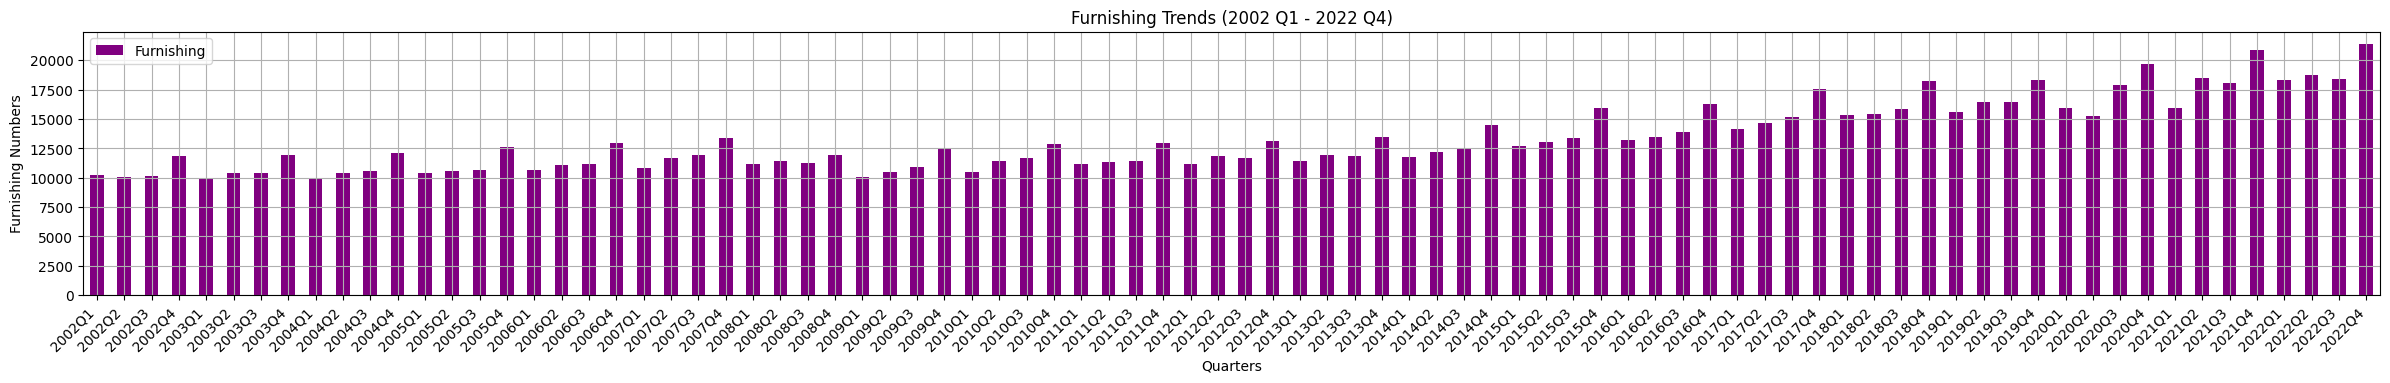

In [568]:
# Plot the total number of furnishing
furnishing_trends = pd.DataFrame({
    'Furnishing': df_trends['Furnishing, household equipment and routine HH maintenance'],
    'Date': date_range.astype(str)  # Convert PeriodIndex back to string for display
})
furnishing_trends.set_index('Date', inplace=True)
furnishing_trends.plot.bar(figsize=(24, 4), legend=True, grid=True, title="Furnishing Trends (2002 Q1 - 2022 Q4)", ylabel="Furnishing Numbers", xlabel="Quarters", color='purple')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### Apply Machine Learning Models
1. K-Nearest Neighbors Regressor (KNN)
2. Linear Regression
3. Multiple Linear Regression
4. Logistic Regression


In [890]:
print(df_housing.columns)
print(df_trends.columns)
print(rents.columns)

print(df_housing)
print(df_trends)
print(rents)

Index(['Date', 'Housing Cost Index', 'Interest Rate (%)', 'Inflation Rate (%)',
       'Employment Levels (000s)', 'Growth in Wage (%)',
       'GDP Growth Rate (%)'],
      dtype='object')
Index(['Date', 'Furnishing, household equipment and routine HH maintenance',
       'Furniture and furnishings, carpets and other floor coverings',
       'Household appliances', 'Repair of household appliances',
       'Goods and services for routine household maintenance'],
      dtype='object')
Index(['Date', 'Actual rentals paid by tenants'], dtype='object')
        Date  Housing Cost Index  Interest Rate (%)  Inflation Rate (%)  \
2    2002 Q1          315.092076           2.691776            3.013669   
5    2002 Q2          630.913169           0.749172            4.197642   
8    2002 Q3          959.070766           3.267249            4.494314   
11   2002 Q4         1253.271955           1.396139            2.107511   
14   2003 Q1         1502.328418           0.645812            1.73808

### **Prepare Data**

In [905]:
# Merge df_housing and df_trends on 'Date'
df_temp = pd.merge(df_housing[['Date', 'Housing Cost Index']], df_trends[['Date','Furnishing, household equipment and routine HH maintenance', 'Goods and services for routine household maintenance']], on='Date')

# Merge the result with rents on 'Date'
df_merged = pd.merge(df_temp, rents[['Date', 'Actual rentals paid by tenants']], on='Date')

In [892]:
X= df_merged[['Actual rentals paid by tenants']]
y= df_merged['Goods and services for routine household maintenance']

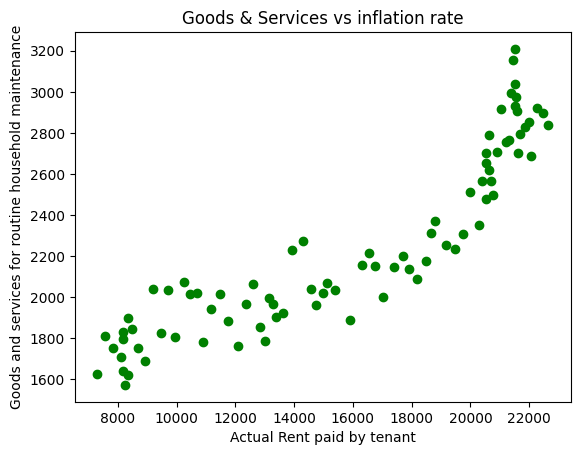

In [893]:
# Visualise the Actual rentals paid and the number of goods and services trends in housing 
plt.scatter(X,y,color = 'g')
plt.title('Goods & Services vs inflation rate')
plt.xlabel('Actual Rent paid by tenant')
plt.ylabel('Goods and services for routine household maintenance')
plt.show()

### Since the data(rental paid by tenants) is continuous we must use **KneighborsRegressor**. 

Mean Squared Error: 15605.625
R² Score: 0.9285470994723288


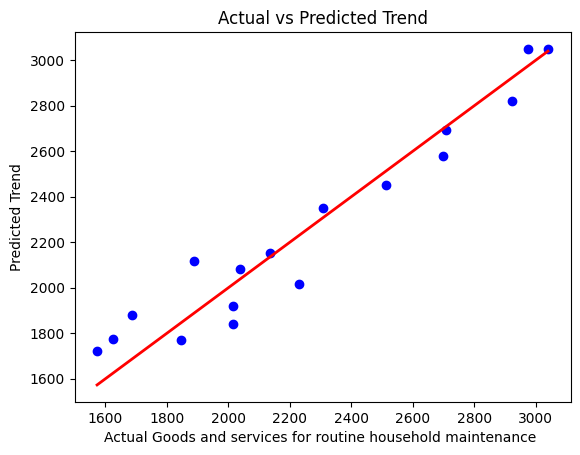

In [894]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepapre Data (Train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialise KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=4)

# Step 3: Fit the model on training data
knn_reg.fit(X_train, y_train)

# Step 4: Predict on test data
y_pred = knn_reg.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualise predictions vs actuals
plt.scatter(y_test, y_pred, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', lw=2)
plt.xlabel('Actual Goods and services for routine household maintenance ')
plt.ylabel('Predicted Trend')
plt.title('Actual vs Predicted Trend')
plt.show()


In [853]:
# An example to test the model: Predict the trend for a new rental value
import pandas as pd

rentals_paid = [[11000], [16500], [21000]]

# Create a DataFrame for the new rent with the same column name as the training data
new_rent_input = pd.DataFrame({'Actual rentals paid by tenants': [rentals_paid]})

# Predict the trend for the new rental value
predicted_trend = knn_reg.predict(rentals_paid)

# Print the result
print(predicted_trend)


[1906.25 2131.75 2733.5 ]


c:\Users\mehrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


-------------------------

### **Linear Regression**
* X is independent variable **'Actual rental paid by tenants'** and y is dependent **'Goods and services for routine household maintenance'**
* Intercept and Coefficient are printed to to explain the nature of the relationship

In [854]:
# Create the model  
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
# Fit the model
linear_reg.fit(X, y)

LinearRegression()

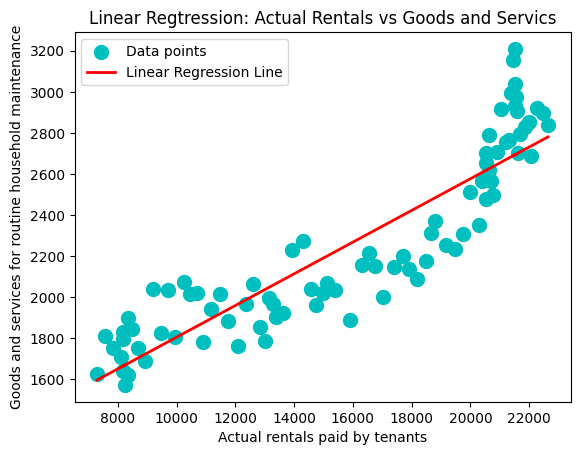

Intercept: 1033.933396935838
Coefficient: 0.07714918903345797


In [855]:
# Make predictions
y_pred_linear = linear_reg.predict(X)

# Plot the regression line and scatter plot
plt.scatter(X, y, color='c', s=100, label='Data points')
plt.plot(X, y_pred_linear, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regtression: Actual Rentals vs Goods and Servics')
plt.xlabel('Actual rentals paid by tenants')
plt.ylabel('Goods and services for routine household maintenance')
plt.legend()
plt.show()

# Pirnt the intercept and coefficient 
print(f"Intercept: {linear_reg.intercept_}")
print(f"Coefficient: {linear_reg.coef_[0]}")

-------------

### **Logistic Regression**
While the dataframe contains continuous data and Logistic Regression is suitable for classification, we can classify the values of 'Goods and Services for routine household maintenance' into two categories 'Low = 0' and 'High = 1' (based on the median line)

* X is independent variable **'Actual rental paid by tenants'** and y is dependent **'Goods and services for routine household maintenance'**
* Intercept and Coefficient are printed to to explain the increase in rent will result a 'High' in goods and services. 

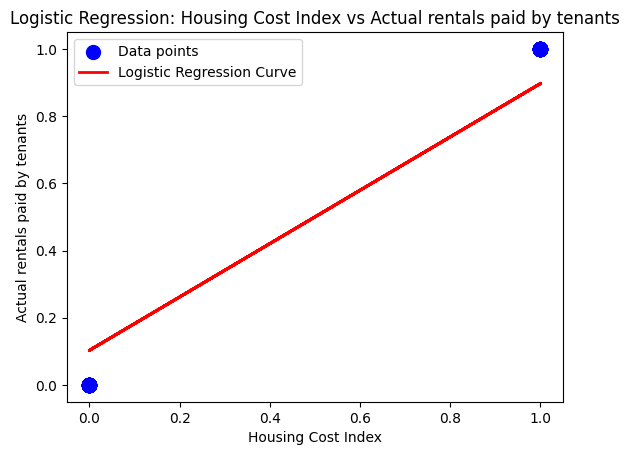

Intercept: -2.1636942560508907
Coefficient: 4.327480099592804


In [870]:
from sklearn.linear_model import LogisticRegression

# Create a binary target based on median
median_value = df_merged['Housing Cost Index'].median()
df_merged['Actual rentals paid by tenants'] = np.where(df_merged['Housing Cost Index'] > median_value, 1, 0)

# Prepare data for logistic regression
X_log = df_merged[['Actual rentals paid by tenants']]  # Independent variable
y_log = df_merged['Housing Cost Index']  # Binary dependent variable

# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_log, y_log)

# Predict probabilities
y_pred_log = log_reg.predict_proba(X_log)[:, 1]

# Plot the logistic curve and scatter plot
plt.scatter(X_log, y_log, color='blue', s=100, label='Data points')
plt.plot(X_log, y_pred_log, color='red', linewidth=2, label='Logistic Regression Curve')
plt.title('Logistic Regression: Housing Cost Index vs Actual rentals paid by tenants')
plt.xlabel('Housing Cost Index')
plt.ylabel('Actual rentals paid by tenants')
plt.legend()
plt.show()

# Print the coefficients
print(f"Intercept: {log_reg.intercept_[0]}")
print(f"Coefficient: {log_reg.coef_[0][0]}")

In [871]:
# Run Prediction
print(log_reg.predict([[0.589]]))
print(log_reg.predict([[0.489]]))

[1]
[0]


c:\Users\mehrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\mehrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
